In [90]:
import requests
import re
import json
import pandas as pd
import numpy as np
from scipy import stats
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [99]:
warnings.filterwarnings('ignore')
req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}

city = 'orem-ut/' #*****change this city to what you want!!!!*****
data_list = []
urls = []
for page in range(1,10):
    if page == 1:
        url = 'https://www.zillow.com/homes/for_sale/'+city
    else:
        url = 'https://www.zillow.com/homes/for_sale/'+city+str(page)+'_p/'
    with requests.Session() as s:
        r = s.get(url, headers=req_headers)
        data = json.loads(re.search(r'!--(\{"queryState".*?)-->', r.text).group(1))
    urls.append(url)
    data_list.append(data)

In [100]:
df = pd.DataFrame()

def make_frame(frame):
    for i in data_list:
        for item in i['cat1']['searchResults']['listResults']:
            frame = frame.append(item, ignore_index=True)
    return frame

df = make_frame(df)

In [101]:
#filter unneccesary columns
df = df.drop('hdpData', 1) #remove this line to see a whole bunch of other random cols, in dict format

#get rid of duplicates
df = df.drop_duplicates(subset='zpid', keep="last")
df['area'] = df['area'].fillna(1)
#filters
df['zestimate'] = df['zestimate'].fillna(0)
df['best_deal'] = df['unformattedPrice'] - df['zestimate']
df['price per sq ft'] = df['unformattedPrice'] / df['area']
df = df.sort_values(by='best_deal',ascending=True)
print('shape:', df.shape)
homes = df[['address','beds','baths','area','price','zestimate','best_deal', 'price per sq ft','unformattedPrice']]

shape: (151, 52)


In [94]:
homes

,address,beds,baths,area,price,zestimate,best_deal,price per sq ft,detailUrl,unformattedPrice
318,"1774 N Heather Dr, Orem, UT 84097",7,4.0,3508,"$689,000",748300,-59300,1.964082e+02,https://www.zillow.com/homedetails/1774-N-Heat...,689000
309,"842 N 235 E, Orem, UT 84057",4,1.0,1280,"$312,000",364400,-52400,2.437500e+02,https://www.zillow.com/homedetails/842-N-235-E...,312000
110,"795 S 800 W, Orem, UT 84058",4,3.0,3040,"$520,000",562700,-42700,1.710526e+02,https://www.zillow.com/homedetails/795-S-800-W...,520000
80,"178 E 1910th St S, Orem, UT 84058",8,5.0,8921,"$1,450,000",1485600,-35600,1.625378e+02,https://www.zillow.com/homedetails/178-E-1910t...,1450000
343,"60 W 255 S, Orem, UT 84058",5,2.0,3148,"$540,000",567200,-27200,1.715375e+02,https://www.zillow.com/homedetails/60-W-255-S-...,540000
...,...,...,...,...,...,...,...,...,...,...
98,"387 E 1350 N #13, Orem, UT 84058",4,3.0,4677,"$1,299,900",0,1299900,2.779346e+02,https://www.zillow.com/homedetails/387-E-1350-...,1299900
131,"383 E 1375 N #17, Orem, UT 84057",5,4.0,5932,"$1,354,900",0,1354900,2.284053e+02,https://www.zillow.com/homedetails/383-E-1375-...,1354900
145,"1646 N 160 E, Orem, UT 84057",None,0.0,1,"$1,500,000",0,1500000,1.500000e+06,https://www.zillow.com/homedetails/1646-N-160-...,1500000
41,"1384 N 450 E, Orem, UT 84097",10,13.0,30386,"$25,000,000",23390900,1609100,8.227473e+02,https://www.zillow.com/homedetails/1384-N-450-...,25000000


In [20]:
## READ TO CSV FILE

# compression_opts = dict(method='zip',
#                         archive_name='slchomes_10_19.csv')  
# homes.to_csv('slchomes_10_19.zip', index=False,
#           compression=compression_opts) 

In [13]:
# make a price range column??? For color as well...

# homesnona = homes.dropna()
# import plotly.express as px
# fig = px.scatter(homesnona, x="beds", y="baths", size = 'area',
#                 hover_data=['price'], color = 'price')
# fig.show()

In [102]:
df = homes
df['beds'] = df['beds'].astype(float)
df['baths'] = df['baths'].astype(float)
print(df.dtypes)

address              object
beds                float64
baths               float64
area                  int64
price                object
zestimate             int64
best_deal             int64
price per sq ft     float64
unformattedPrice      int64
dtype: object


In [103]:
df.describe(include='all')

,address,beds,baths,area,price,zestimate,best_deal,price per sq ft,unformattedPrice
count,151,133.000000,134.000000,151.000000,151,1.510000e+02,1.510000e+02,1.510000e+02,1.510000e+02
unique,151,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN
top,"1774 N Heather Dr, Orem, UT 84097",NaN,NaN,NaN,"$499,900",NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
mean,NaN,4.270677,3.000000,2629.390728,NaN,5.376699e+05,2.288889e+05,5.552700e+04,7.665588e+05
std,NaN,1.614929,1.516823,2812.026979,NaN,1.917963e+06,3.871461e+05,2.209559e+05,2.026003e+06
min,NaN,2.000000,0.000000,1.000000,NaN,0.000000e+00,-5.930000e+04,7.866667e+01,6.490000e+04
25%,NaN,3.000000,2.000000,1486.000000,NaN,0.000000e+00,4.800000e+03,1.967834e+02,3.990000e+05
50%,NaN,4.000000,3.000000,2330.000000,NaN,4.350010e+05,1.040000e+04,2.343478e+02,5.090000e+05
75%,NaN,5.000000,4.000000,3238.000000,NaN,5.413190e+05,3.599750e+05,2.884275e+02,6.749500e+05


In [38]:
df.isnull().sum()

address              0
beds                18
baths               17
area                 0
price                0
zestimate            0
best_deal            0
price per sq ft      0
detailUrl            0
unformattedPrice     0
dtype: int64

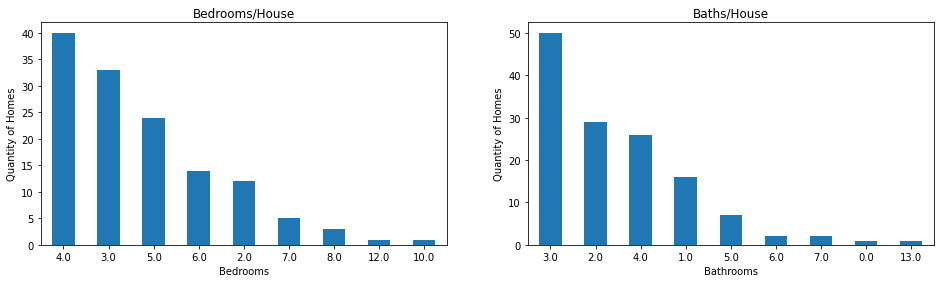

In [105]:
plt.subplot(221)
df['beds'].value_counts().plot(kind='bar', title='Bedrooms/House', figsize=(16,9))
plt.xticks(rotation=0)
plt.xlabel('Bedrooms')
plt.ylabel('Quantity of Homes')

plt.subplot(222)
df['baths'].value_counts().plot(kind='bar', title='Baths/House')
plt.xticks(rotation=0)
plt.xlabel('Bathrooms')
plt.ylabel('Quantity of Homes')

# plt.subplot(223)
# df['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')
# plt.xticks(rotation=0)

# plt.subplot(224)
# df['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course')
# plt.xticks(rotation=0)

plt.show()

<AxesSubplot:xlabel='area', ylabel='Density'>

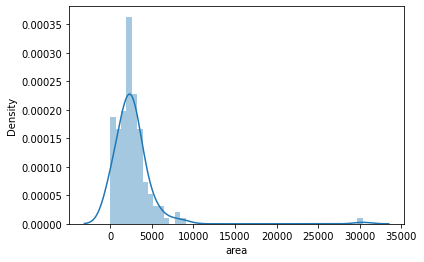

In [12]:
sns.distplot(df['area'])

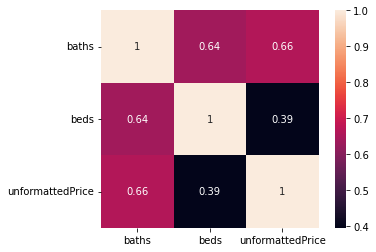

In [40]:
corr = df[['baths','beds','unformattedPrice']].corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

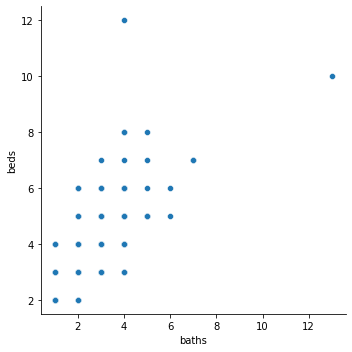

In [43]:
sns.relplot(x='baths', y='beds', data=df)

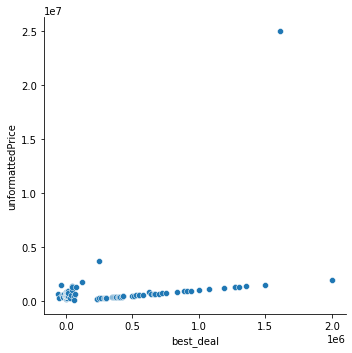

In [46]:
sns.relplot(x='best_deal', y='unformattedPrice', data=df)

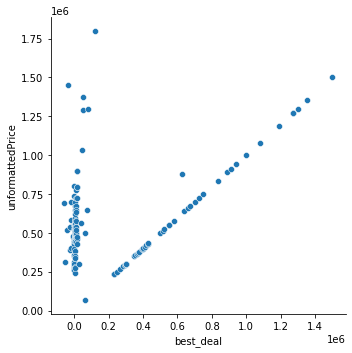

In [87]:
df = df[(np.abs(stats.zscore(df['unformattedPrice'])) < 3)]
sns.relplot(x='best_deal', y='unformattedPrice', data=df)

NameError: name 'eda' is not defined